# Monte Carlo Simulation with mcdapy
by Guilherme Fernandes Alves, 2022

Let's start by importing the necessary packages:

In [1]:
import mcdapy
import numpy as np
import matplotlib.pyplot as plt


We can also set some options to improve the visualization of the plots

In [2]:
%load_ext autoreload
%autoreload 2
# %config InlineBackend.figure_formats = ['svg']
# %matplotlib inline

## Input data

Here we define the input data for the simulation. We will save everything in a 
dictionary. There are three main parameters that we need to define:

- Alternatives: What are the solution options for decision making? 
- Criteria: What are the 
- Values: What is the value of each alternative for each criterion?
- Weights: What is the weight of each criterion among others?

For each one of the values, we will define three parameters: mean value, 
standard deviation and distribution probability.

In [3]:
analysis_dict = {
    "alternatives": {  # Each tuple represents (mean, stdev, distribution)
        "A": {
            "C1": (6.00, 1.00, "normal"),
            "C2": (2.00, 0.50, "normal"),
            "C3": (4.00, 0.12, "normal"),
            "C4": (0.25, 0.02, "uniform"),
        },
        "B": {
            "C1": (3.00, 0.10, "normal"),
            "C2": (3.00, 0.50, "normal"),
            "C3": (3.00, 0.01, "normal"),
            "C4": (0.25, 0.01, "uniform"),
        },
        "C": {
            "C1": (1.0, 0.01, "normal"),
            "C2": (5.0, 0.50, "normal"),
            "C3": (3.0, 0.07, "normal"),
            "C4": (0.5, 0.01, "uniform"),
        },
    },
    "weights": [
        (0.2, 0.01, "uniform"),
        (0.4, 0.05, "normal"),
        (0.1, 0.01, "normal"),
        (0.3, 0.01, "normal"),
    ],
}


The alternatives are, in this case, the 'A', 'B', and 'C'. It means that we have
to determinate the best option among these three. 
The criteria are the 'C1', 'C2', 'C3', and 'C4'.

Notice that both the values and the weights are following different distributions, 
and each one has its own mean and standard deviation.


## Nominal simulation

Once we already have defined all the values, one can simulate the decision making
using only the mean values. This is called the nominal simulation. 

This calculation is very simple, and it is just a matter of multiplying the
values by the weights and summing them up. The alternative with the highest
sum (a.k.a 'pertinence index') is the best option.

Nevertheless, we will use mcdapy package to do this calculation.

First, let's retrieve the information from the dictionary and save it in a format
more appropriate for the mcdapy.

In [4]:
alternatives = list(analysis_dict["alternatives"].keys())
criteria = list(analysis_dict["alternatives"][alternatives[0]].keys())

nominal_weights = np.array(
    [analysis_dict["weights"][i][0] for i in range(len(criteria))]
)
nominal_matrix = np.array(
    [
        [
            analysis_dict["alternatives"][alternative][criterion][0]
            for criterion in criteria
        ]
        for alternative in alternatives
    ]
)


Now that we have the variables in the correct format, we can use the mcdapy to
calculate the nominal simulation. We will use the Pattern method, which is the
default method. 

In [5]:
nominal = mcdapy.Pattern(
    alternatives=alternatives,
    criteria=criteria,
    matrix=nominal_matrix,
    weights=nominal_weights,
)


Once initialized, we can use the method 'run' to calculate the nominal simulation.

In [6]:
nominal.solve()


We can use the following cell to access all the attributes available in the 
simulation object:


In [7]:
nominal.__dict__


{'alternatives': ['A', 'B', 'C'],
 'criteria': ['C1', 'C2', 'C3', 'C4'],
 'matrix': array([[6.  , 2.  , 4.  , 0.25],
        [3.  , 3.  , 3.  , 0.25],
        [1.  , 5.  , 3.  , 0.5 ]]),
 'weights': array([0.2, 0.4, 0.1, 0.3]),
 'n_alternatives': 3,
 'n_criteria': 4,
 'normalized_weights': array([0.2, 0.4, 0.1, 0.3]),
 'normalized_matrix': array([[0.6 , 0.2 , 0.4 , 0.25],
        [0.3 , 0.3 , 0.3 , 0.25],
        [0.1 , 0.5 , 0.3 , 0.5 ]]),
 'weighted_matrix': array([[0.12 , 0.08 , 0.04 , 0.075],
        [0.06 , 0.12 , 0.03 , 0.075],
        [0.02 , 0.2  , 0.03 , 0.15 ]]),
 'pertinence_index': array([0.315, 0.285, 0.4  ]),
 'ranking': array([2, 0, 1], dtype=int64),
 'ranking_named': ['C', 'A', 'B']}

However, the above output is a bit hard to follow. We can use some plot methods
to improve our visualization then.

First, let's take a look at the normalized weighted matrix. This matrix is the
result of multiplying the values by the weights. The values are normalized to
the range [0, 1] before the multiplication.

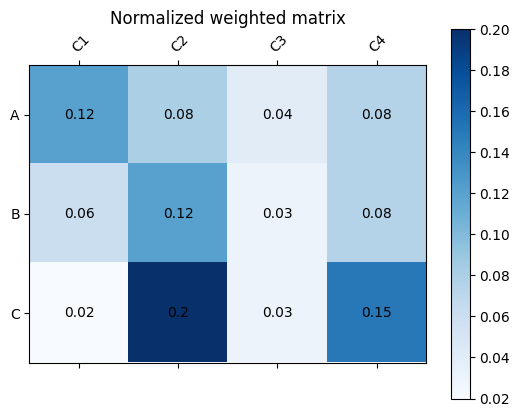

In [8]:
nominal.plot_matrix()


We can already sum the values in each row to get the pertinence index. However,
we can also use the method 'plot_rank' to do this calculation for us.

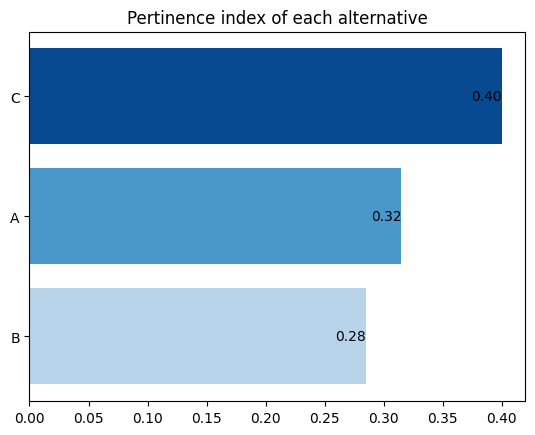

In [9]:
nominal.plot_rank()


The above plot shows the pertinence index for each alternative. The alternative
with the highest pertinence index is the best option, in this case, the 'C'.

Also, it suggests that alternative 'A' is the second best option, and 'B' is the
third best option, also known as the 'worst'.

Additionally, we can see that the pertinence index for the 'C' alternative is
more distant from the other alternatives than the other two. This means that the
'C' alternative is the best option, and the other two are not so different from
each other.

In most of the cases in real life, we cannot rely only on the mean values. We
need to take into account the uncertainty of the data. 

This is where the Monte Carlo simulation comes in. It is a method that allows us
to simulate the decision making process using the real data, including the
uncertainty in the analysis.

In other words, given that we can estimate the behavior of the input data and 
represent it by a probability distribution, we can use the Monte Carlo simulation
process to infer how the input data will be affected by the uncertainty. Thus, 
allowing us to make better decisions. 

# Monte Carlo simulation

First things first, let's define the number of simulations that we want to run.

In [10]:
n = 100000  # Number of simulations


Mcdapy allows us for a very straightforward way to run the Monte Carlo simulation.
It is just a matter of calling defining an instance of the MonteCarlo class and
calling the method 'run'. Let's do it:

In [11]:
mc = mcdapy.MonteCarlo(analysis_dict, n=n, method="PATTERN")
mc.run()


With the Monte Carlo simulation already run, we can use more plot methods to
visualize the results.

Everything is already inside the mcdapy package, so we can simply call each 
method and, then, discuss the results.

## Results

First, looking at the distribution of the pertinence index for each alternative:

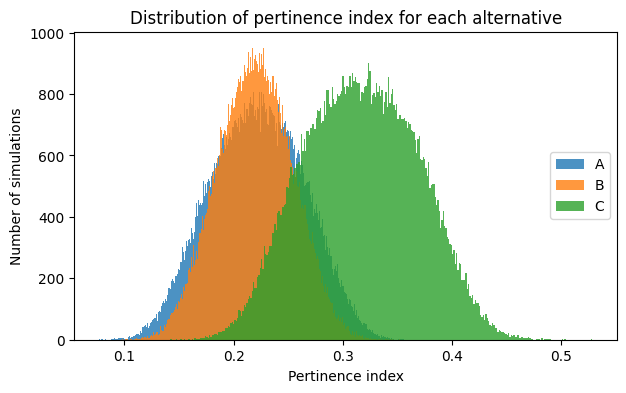

In [12]:
mc.plot_pertinence_index()


Well, not surprisingly, the 'C' alternative is still the best option. 
However, we can see how close the 'A' and 'B' alternatives are to each other.


Alternatively, we can plot a confusion matrix to cross the occurrences of 
alternatives in each position of the ranking.

It can be seem that the alternative C was the best option in, roughly, 90% of the
simulations. 

This also reveals a trick consideration:
- The alternative 'B' can be seem as the second, but with a very close margin to
the alternative 'A'. 
- On the other hand, however, the alternative 'B' had more occurrences as the 'worst' alternative than the alternative 'A' at the same position.

It is important to notice that, before the Monte Carlo simulations, the 
similarity between the alternatives 'A' and 'B' existed but was not so clear as
it is now.

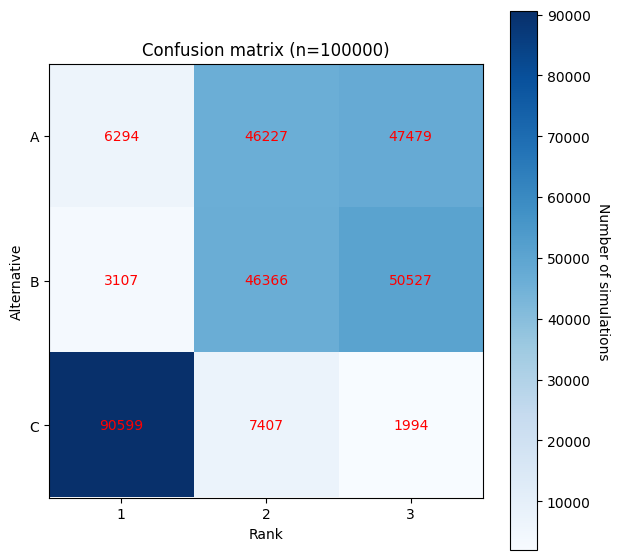

In [13]:
mc.plot_ranking_distributions()


It is also important taking a look at the distribution of the input data used 
in the simulations. Starting with the weights:

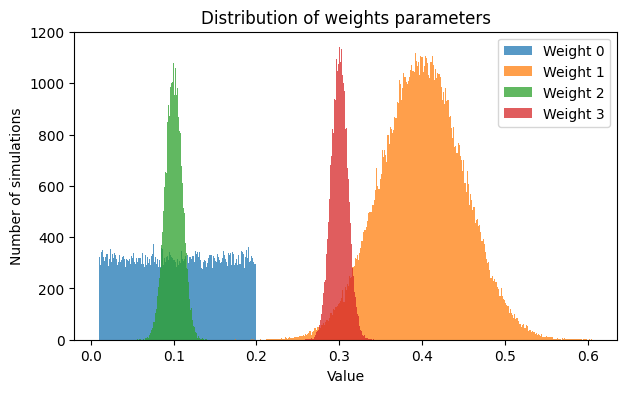

In [14]:
mc.plot_weights_set()


The above plot illustrate very well how the weights follow very different
distributions functions, as expected.
This is also a good way to check that the simulation is properly working.

A not so obvious thing to notice is that, sometimes, the different input parameters
can be correlated. This can be analyzed by, for example, comparing the different 
distributions of the weights and the values.

First, let's take a look at the distribution of the values presented in our matrix:

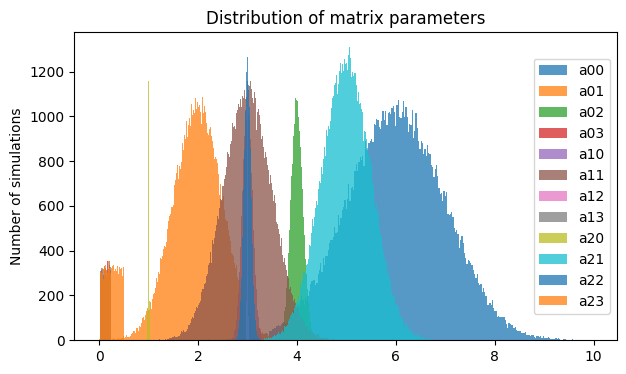

In [15]:
mc.plot_matrix_set()


The above distribution, however, is not very clear. We can plot, instead, the
normalized values, which are the values divided by the maximum value in each
column. This way, we can compare the values of each criterion in a more.

Also, let's separate the 12 distributions into 3 different plots, one for each
alternative.

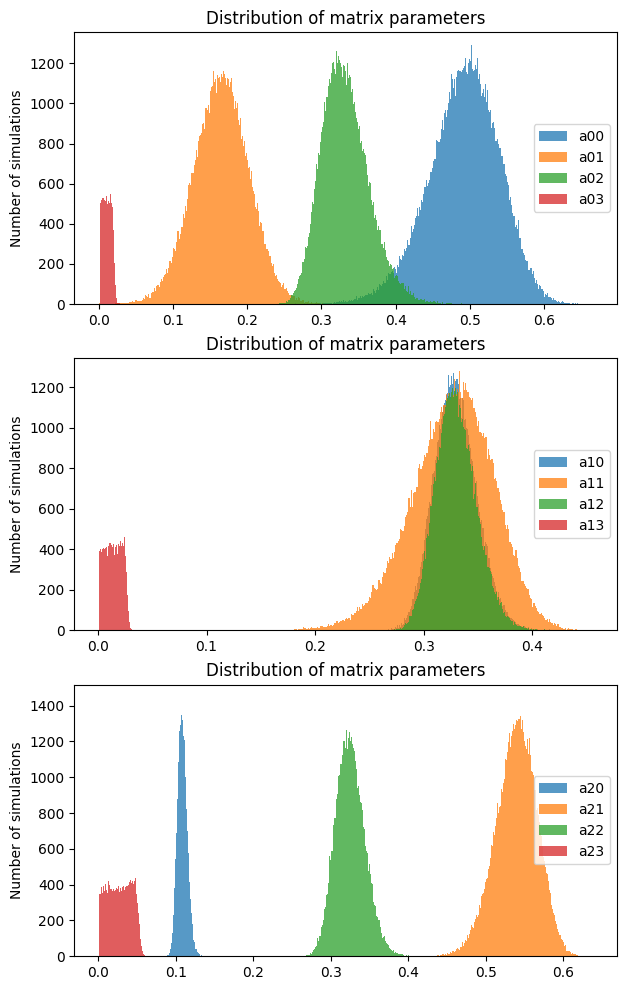

In [16]:
mc.plot_normalized_set()


A confusion matrix can be generated to cross the distribution of each values 
of our matrix and, this way, search for correlations between the different inputs.

The numerical scale represents the person coefficient of correlation between the
two variables. The closer to 1, the stronger the correlation. 

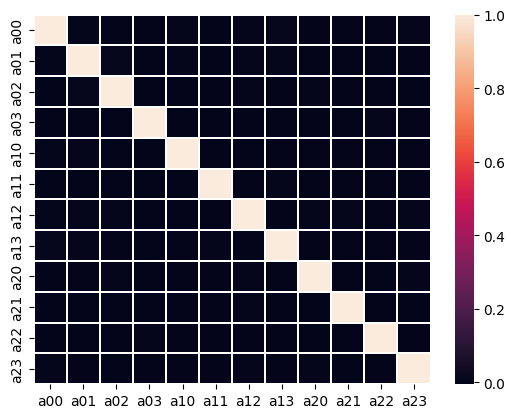

In [17]:
mc.plot_confusion_matrix()


Alternatively, we can plot all the charts at once by running the following cell:

In [18]:
# mc.all_plots()


Finally, we can convert this jupyter notebook to html using the following command:

In [19]:
!jupyter nbconvert --to html monte_carlo.ipynb

[NbConvertApp] Converting notebook monte_carlo.ipynb to html
[NbConvertApp] Writing 779252 bytes to monte_carlo.html
